In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
import os
import numpy as np
import seaborn as sns
import pandas as pandas
import matplotlib.pyplot as plt

import sklearn.metrics

import tissue.api as tissue

import scanpy as sc
sc.settings.set_figure_params(dpi=80)

import warnings
warnings.filterwarnings('ignore')

In [3]:
# user = "david.fischer"
# user = "ina"
user = "mayar.ali"

if user == "david.fischer":
    base_path_gcn = "/Users/david.fischer/phd/seafile/DavidFischer_notforFabian/tissue/grid_searches/basel_zurich/"
    base_path_mi = "/Users/david.fischer/phd/seafile/DavidFischer_notforFabian/tissue/grid_searches/basel_zurich/"
    base_path_reg = "/Users/david.fischer/phd/seafile/DavidFischer_notforFabian/tissue/grid_searches/basel_zurich/"
elif user == "ina":
    base_path_gcn = '../../results/GCN/basel_zurich/'
    base_path_reg = '../../results/REG/basel_zurich/'
    
elif user == "mayar.ali":
    base_path_gcn = "/home/iterm/mayar.ali/phd/projects/tissue/grid_searches/refactor/basel_zurich/"
    base_path_mi = "/home/iterm/mayar.ali/phd/projects/tissue/grid_searches/refactor/basel_zurich/"
    base_path_reg = "/home/iterm/mayar.ali/phd/projects/tissue/grid_searches/refactor/basel_zurich/"


In [4]:
dir_figures="/lustre/groups/ml01/workspace/mayar.ali/tissue/figures/basel_zurich/"

In [5]:
data_key='bz'
group_name='grade'
feature_space='types'
cell_type_coarseness='fine'

### 1. Molecular and cell types models comparison

A. Loading trained models

In [6]:
source_path={
    # molecular
    "22050309558_GCNSS_NONE_GRADE_STANDARD_basel_zurich_RADIUS_mt": base_path_gcn,
    "2205040840_GCN_NONE_GRADE_STANDARD_basel_zurich_RADIUS": base_path_gcn,
    "2205160953_GCN_NONE_GRADE_STANDARD_basel_zurich_RADIUS": base_path_gcn,
    "2205050930_MI_NONE_GRADE_STANDARD_basel_zurich_RADIUS": base_path_mi,
    "2205050931_REG_GRADE_STANDARD": base_path_reg,
    
    # types
    "2206091155_GCNSS_NONE_GRADE_TYPE_basel_zurich_RADIUS_mt": base_path_gcn,
    "2206091154_GCN_NONE_GRADE_TYPE_basel_zurich_RADIUS": base_path_gcn,
    "2206091156_MI_NONE_GRADE_TYPE_basel_zurich_RADIUS": base_path_mi,
    "2206211217_REG_GRADE_TYPE_SMALL": base_path_reg,


}
gs_ids=[
    # molecular
    "22050309558_GCNSS_NONE_GRADE_STANDARD_basel_zurich_RADIUS_mt",
    "2205040840_GCN_NONE_GRADE_STANDARD_basel_zurich_RADIUS",
    "2205160953_GCN_NONE_GRADE_STANDARD_basel_zurich_RADIUS",
    "2205050930_MI_NONE_GRADE_STANDARD_basel_zurich_RADIUS",
    "2205050931_REG_GRADE_STANDARD",
    
    # types
    "2206091155_GCNSS_NONE_GRADE_TYPE_basel_zurich_RADIUS_mt",
    "2206091154_GCN_NONE_GRADE_TYPE_basel_zurich_RADIUS",
    "2206091156_MI_NONE_GRADE_TYPE_basel_zurich_RADIUS",
    "2206211217_REG_GRADE_TYPE_SMALL",
    
]

In [7]:
container = tissue.fits.GridSearchContainer(
    source_path=source_path,
    gs_ids=gs_ids
)
container.load_gs()

loaded 22050309558_GCNSS_NONE_GRADE_STANDARD_basel_zurich_RADIUS_mt: 108 runs with 6-fold cross validation
loaded 2205040840_GCN_NONE_GRADE_STANDARD_basel_zurich_RADIUS: 108 runs with 6-fold cross validation
loaded 2205160953_GCN_NONE_GRADE_STANDARD_basel_zurich_RADIUS: 108 runs with 6-fold cross validation
loaded 2205050930_MI_NONE_GRADE_STANDARD_basel_zurich_RADIUS: 162 runs with 6-fold cross validation
loaded 2205050931_REG_GRADE_STANDARD: 72 runs with 6-fold cross validation
loaded 2206091155_GCNSS_NONE_GRADE_TYPE_basel_zurich_RADIUS_mt: 4 runs with 6-fold cross validation
loaded 2206091154_GCN_NONE_GRADE_TYPE_basel_zurich_RADIUS: 4 runs with 6-fold cross validation
loaded 2206091156_MI_NONE_GRADE_TYPE_basel_zurich_RADIUS: 4 runs with 6-fold cross validation
loaded 2206211217_REG_GRADE_TYPE_SMALL: 12 runs with 6-fold cross validation


B. Feature space comparison analysis

selected ['model_class']
means=model_class
GCN      0.545049
GCNSS    0.523954
MI       0.526241
MLP      0.440771
Name: test_grade_custom_categorical_acc, dtype: float64
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MI_molecular v.s. MI_types: t-test independent samples, P_val=3.828e-02 stat=2.385e+00
MLP_molecular v.s. MLP_types: t-test independent samples, P_val=2.921e-01 stat=1.112e+00
GCN_molecular v.s. GCN_types: t-test independent samples, P_val=8.101e-03 stat=3.294e+00
GCNSS_molecular v.s. GCNSS_types: t-test independent samples, P_val=8.031e-03 stat=3.299e+00


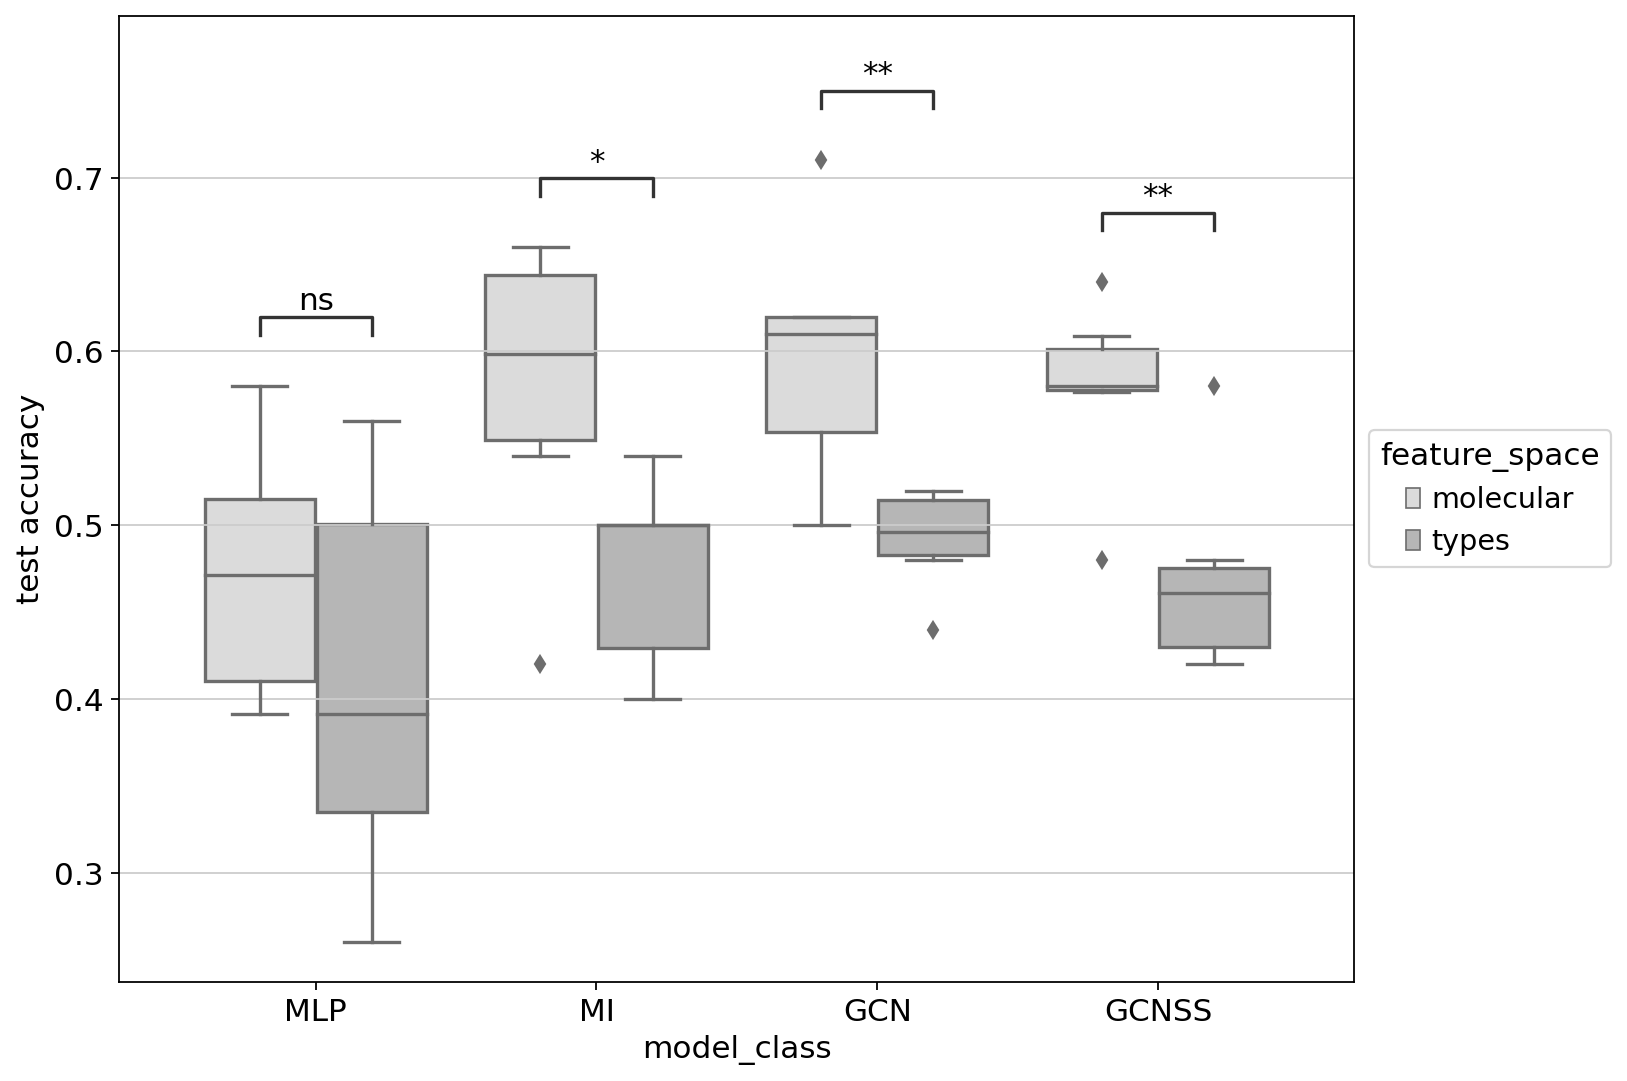

In [8]:
sns.set_palette("gray_r")
container.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show=group_name + "_custom_categorical_acc",
    partition_select="train",
    metric_select=group_name + "_loss",
    cv_mode="mean",
    param_hue="feature_space", 
    param_x=['model_class'],
#     save=dir_figures+f"model_comaprison_accuracy_molecular_vs_types_{cell_type_coarseness}", 
    suffix=".pdf",
    panel_width = 10,
    panel_height = 7,
    ttest = True,
    feature_space = True,
    show_swarm = False,
)

### 2. Benchmarking cell type models

A. Loading trained models

In [9]:
source_path={    
    "2206091155_GCNSS_NONE_GRADE_TYPE_basel_zurich_RADIUS_mt": base_path_gcn,
    "2206091154_GCN_NONE_GRADE_TYPE_basel_zurich_RADIUS": base_path_gcn,
    "2206091156_MI_NONE_GRADE_TYPE_basel_zurich_RADIUS": base_path_mi,
    "2206211217_REG_GRADE_TYPE_SMALL": base_path_reg,


}
gs_ids=[    
    "2206091155_GCNSS_NONE_GRADE_TYPE_basel_zurich_RADIUS_mt",
    "2206091154_GCN_NONE_GRADE_TYPE_basel_zurich_RADIUS",
    "2206091156_MI_NONE_GRADE_TYPE_basel_zurich_RADIUS",
    "2206211217_REG_GRADE_TYPE_SMALL",
    
]

In [10]:
container_typ = tissue.fits.GridSearchContainer(
    source_path=source_path,
    gs_ids=gs_ids,
)
container_typ.load_gs()

loaded 2206091155_GCNSS_NONE_GRADE_TYPE_basel_zurich_RADIUS_mt: 4 runs with 6-fold cross validation
loaded 2206091154_GCN_NONE_GRADE_TYPE_basel_zurich_RADIUS: 4 runs with 6-fold cross validation
loaded 2206091156_MI_NONE_GRADE_TYPE_basel_zurich_RADIUS: 4 runs with 6-fold cross validation
loaded 2206211217_REG_GRADE_TYPE_SMALL: 12 runs with 6-fold cross validation


B. Model comparison analysis

selected ['model_class']
means=model_class
GCN      0.491997
GCNSS    0.470305
MI       0.474300
MLP      0.409274
Name: test_grade_custom_categorical_acc, dtype: float64
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MLP_types v.s. MI_types: t-test independent samples, P_val=2.510e-01 stat=-1.219e+00
MI_types v.s. GCN_types: t-test independent samples, P_val=5.182e-01 stat=-6.697e-01
MI_types v.s. GCNSS_types: t-test independent samples, P_val=9.077e-01 stat=1.189e-01


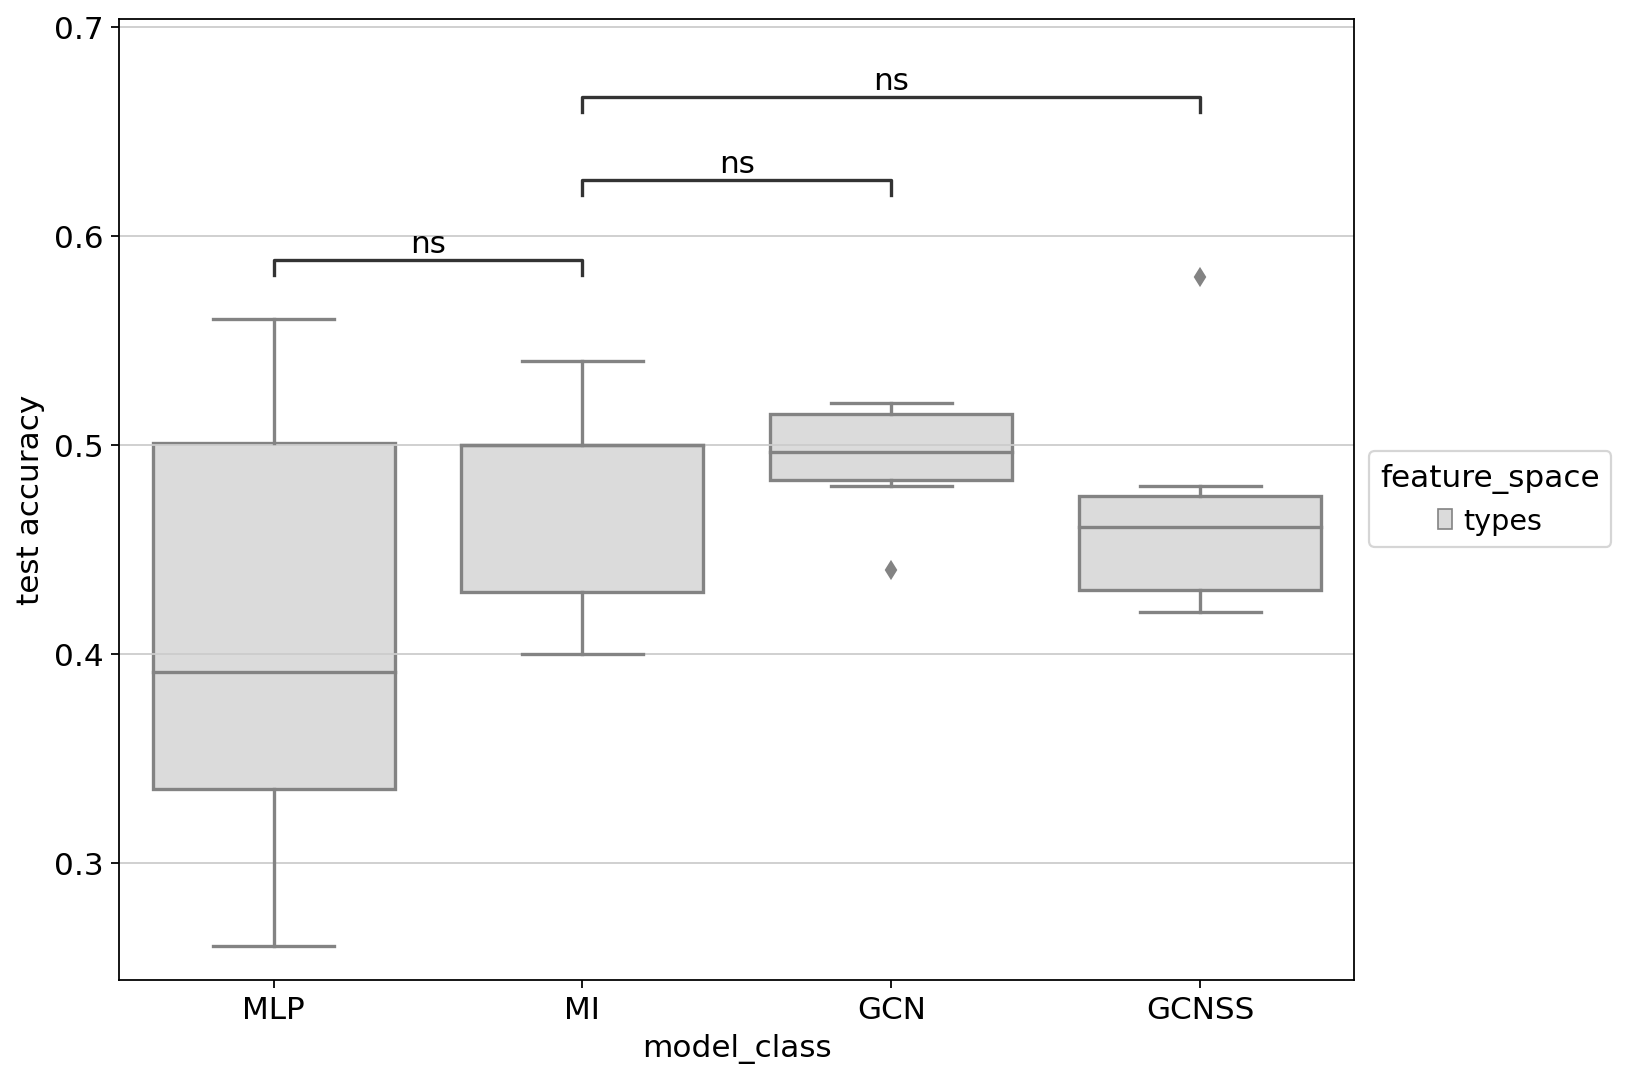

In [11]:
sns.set_palette("gray_r")
container_typ.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show=group_name + "_custom_categorical_acc",
    partition_select="train",
    metric_select=group_name + "_loss",
    cv_mode="mean",
    param_hue="feature_space",  #  feature_space, depth_feature_embedding
    param_x=['model_class'],
#     save=dir_figures+f"model_comaprison_accuracy_{feature_space}_{cell_type_coarseness}_suppfig4b", 
    suffix=".pdf",
    panel_width = 10,
    panel_height = 7,
    ttest = True,
    types = True,
    show_swarm = False,
)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MLP v.s. MI: t-test independent samples, P_val=1.101e-02 stat=-2.690e+00
MI v.s. GCN: t-test independent samples, P_val=4.545e-01 stat=-7.567e-01
MI v.s. GCNSS: t-test independent samples, P_val=8.146e-01 stat=-2.364e-01


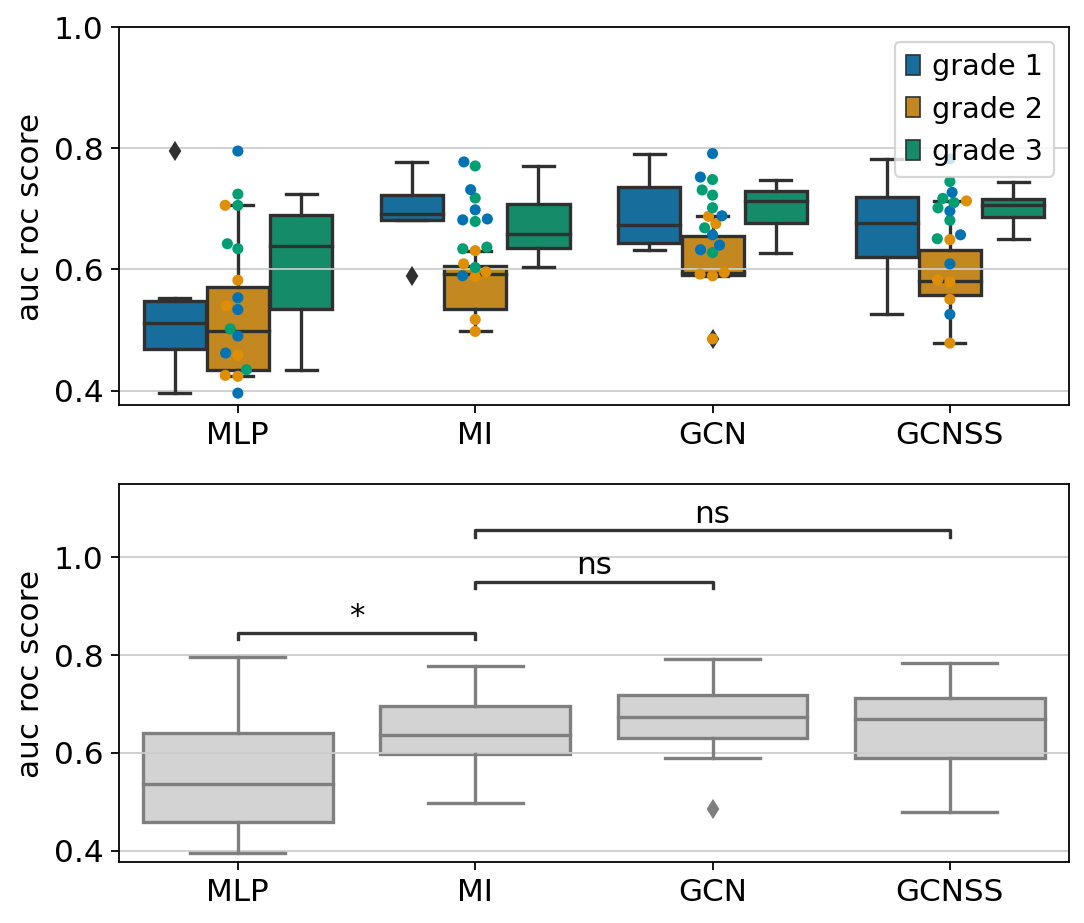

In [12]:
sns.set_palette('colorblind')
container_typ.plot_best_model_roc_auc(
    partition_show="test",
    partition_select="train",
    metric_select=group_name + "_loss",
    cv_mode="mean",
    suffix=".pdf",
    panel_width = 7,
    panel_height = 6,
    ttest=True,
    plot_all_groups=True,
#     save=dir_figures+f"model_comparison_roc_auc_{feature_space}_{cell_type_coarseness}_suppfig4ac"
)

### 3. Analysis on GCN SS

In [17]:
model_class="GCNSS"

A. Loading trained models

In [13]:
container_gcnss = tissue.fits.GridSearchContainer(
    source_path={
        "2206091155_GCNSS_NONE_GRADE_TYPE_basel_zurich_RADIUS_mt": base_path_gcn,
    },
    gs_ids=[
        "2206091155_GCNSS_NONE_GRADE_TYPE_basel_zurich_RADIUS_mt",
    ]
)
container_gcnss.load_gs()

loaded 2206091155_GCNSS_NONE_GRADE_TYPE_basel_zurich_RADIUS_mt: 4 runs with 6-fold cross validation


In [14]:
gs_id, model_id, cv = container_gcnss.get_best_model_id(partition_select='train')
container_gcnss.get_info(gs_id = gs_id, model_id=model_id)

B. GCN SS analysis

Confusion matrix on test set:


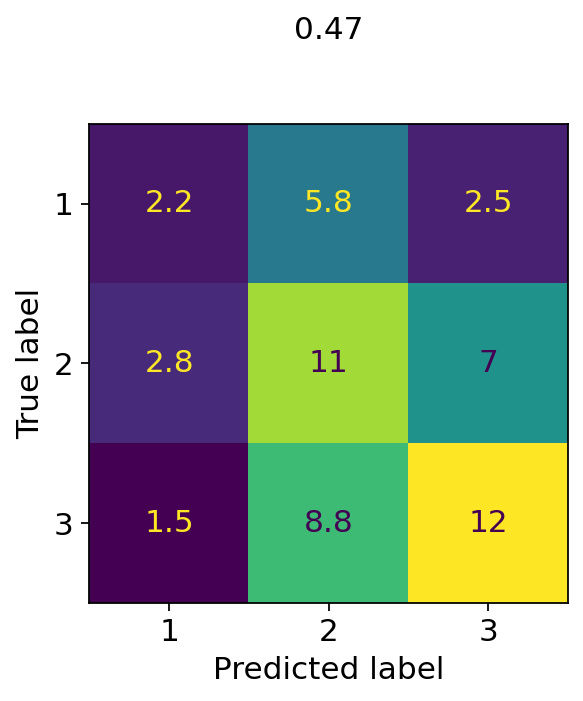

Confusion matrix on val set:


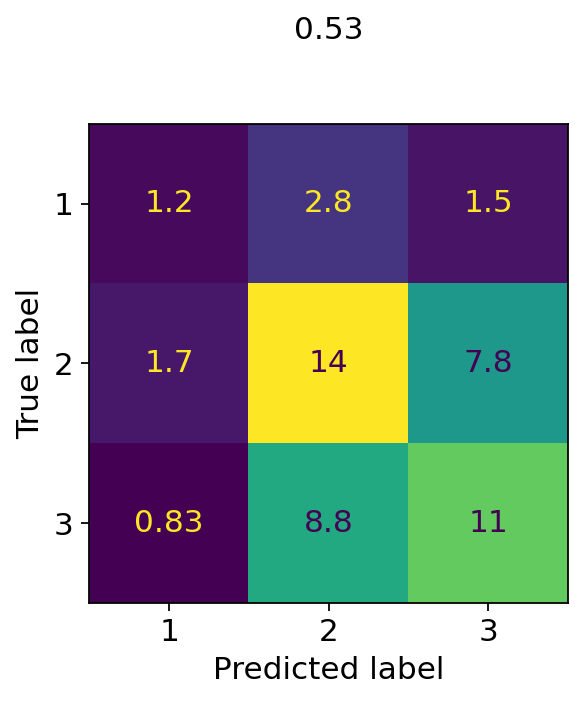

Confusion matrix on train set:


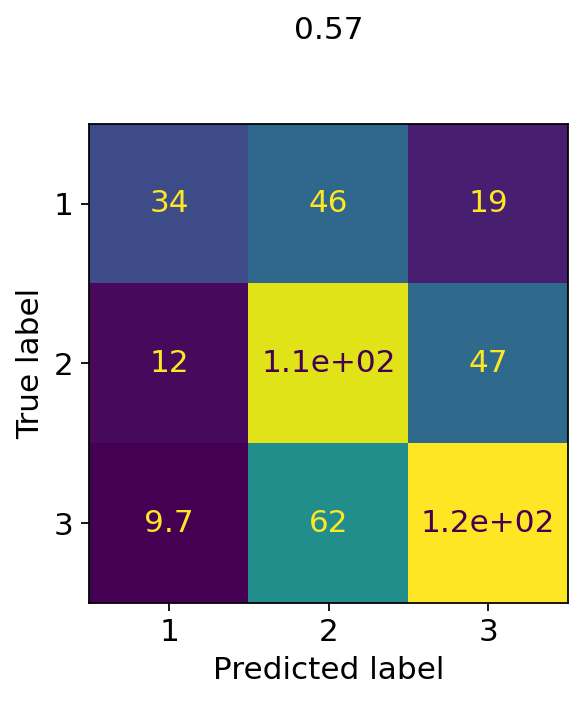


test
Grade 1 : 0.21693121693121695
Grade 2 : 0.5367458975620548
Grade 3 : 0.55152917131178
mean : 0.47030471943515423

val
Grade 1 : 0.21527777777777776
Grade 2 : 0.5923257043157619
Grade 3 : 0.5293024227234754
mean : 0.5237389419044454

train
Grade 1 : 0.34463590705840286
Grade 2 : 0.6541443461534725
Grade 3 : 0.6172346888873951
mean : 0.572491692109525


In [15]:
# plotting confusion metrices

sns.set_palette('colorblind')
print('Confusion matrix on test set:')
container_gcnss.plot_confusion_matrix(
    target_label=group_name,
    partition_show='test',
    mean_across_cv=True,
#     save=dir_figures+f"gcnss_analysis_confusion_mtx_test_{feature_space}_{cell_type_coarseness}", 
    x_ticks=['1', '2', '3'],
)


print('Confusion matrix on val set:')

container_gcnss.plot_confusion_matrix(
    target_label=group_name,
    partition_show='val',
    mean_across_cv=True,
#     save=dir_figures+f"gcnss_analysis_confusion_mtx_val_{feature_space}_{cell_type_coarseness}", 
    x_ticks=['1', '2', '3'],
)

print('Confusion matrix on train set:')
container_gcnss.plot_confusion_matrix(
    target_label=group_name,
    partition_show='train',
    mean_across_cv=True,
#     save=dir_figures+f"gcnss_analysis_confusion_mtx_train_{feature_space}_{cell_type_coarseness}", 
    x_ticks=['1', '2', '3']
)


for partition in ['test', 'val','train']:
    print()
    print(partition)
    mean = []
    for grade in [0, 1, 2]:
        acc = []
        for cv in ['cv0', 'cv1', 'cv2', 'cv3', 'cv4', 'cv5']:
            preds = np.argmax(container_gcnss.info[cv]['predictions'][partition][group_name], axis=1)
            true = np.argmax(container_gcnss.true_labels[cv][partition][group_name], axis=1)
            acc.append(np.mean(preds[true==grade] == true[true==grade]))
            if grade == 0:
                mean.append(np.mean(preds == true))
        mean_acc = np.mean(acc)
        print("Grade", grade+1, ":", mean_acc)
    mean = np.mean(mean)
    print("mean :", mean)

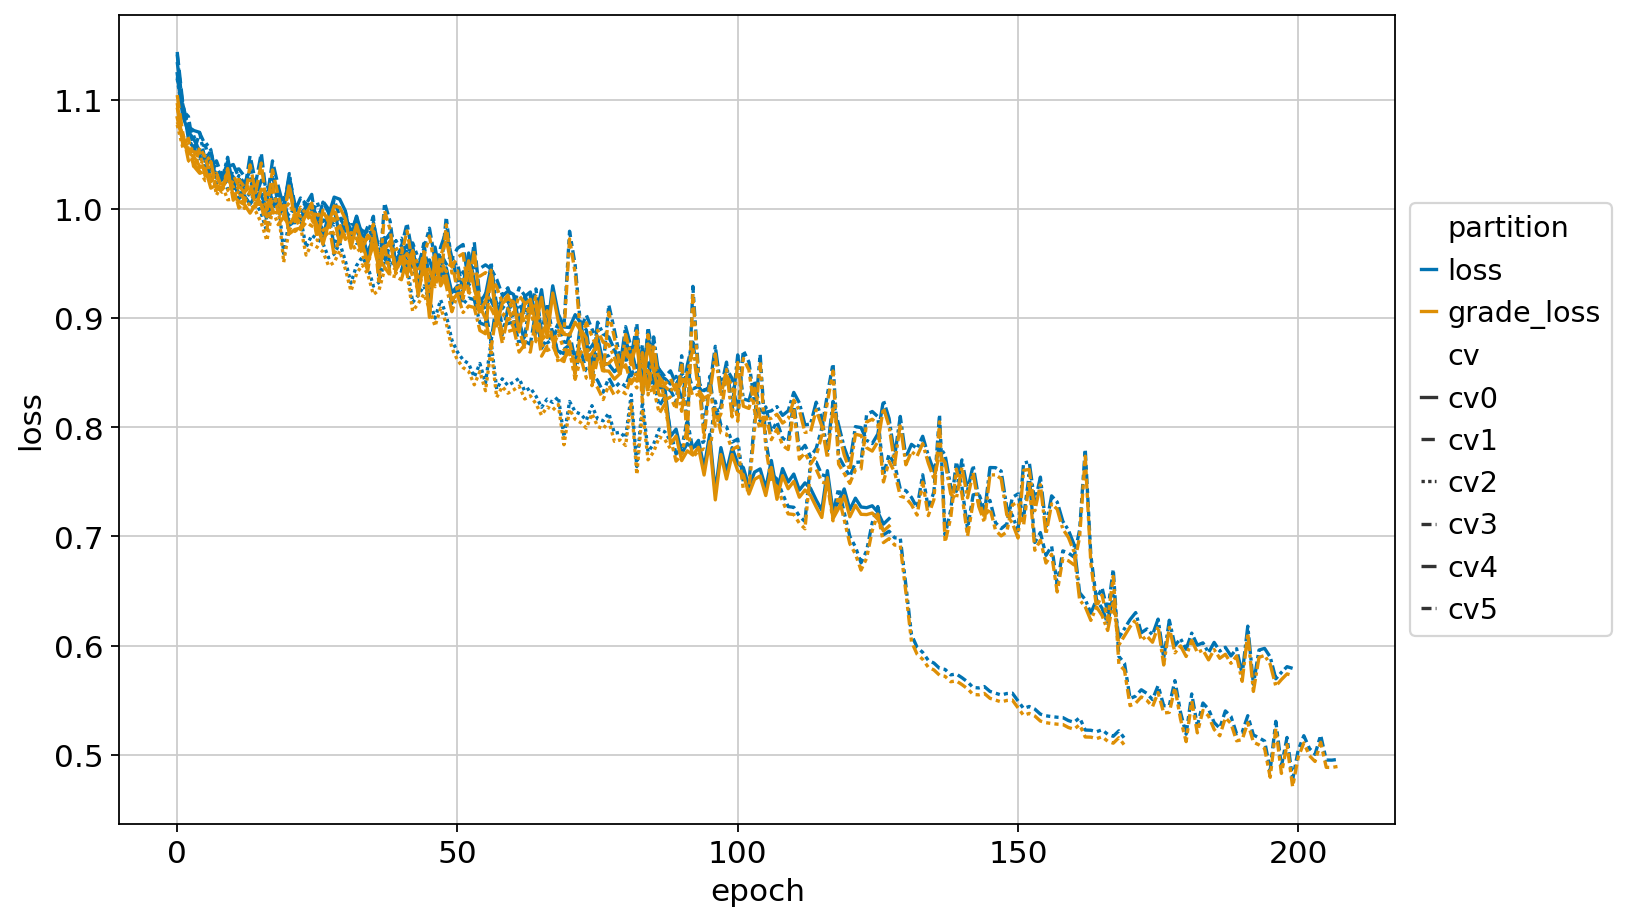

In [16]:
container_gcnss.plot_training_history(
    plot_metrics=['loss', f'{group_name}_loss'],
#     save=dir_figures+f"gcnss_analysis_training_history_curve_{feature_space}_{cell_type_coarseness}", 
)


C. GCN SS interpretation analysis

In [18]:
interpreter = tissue.fits.InterpreterGraph(
    results_path=base_path_gcn + gs_id + "/results/", 
    cv=cv, 
    model_id=model_id, 
    model_class=model_class,
)
interpreter.load_model()

data_path="/lustre/groups/ml01/workspace/mayar.ali/tissue/data/zenodo/"
buffered_data_path="/lustre/groups/ml01/workspace/mayar.ali/tissue/data/zenodo/refactored/buffer"
interpreter.get_data_again(
    data_path=data_path,
    buffered_data_path=buffered_data_path,
)

2022-08-23 12:19:48.985133: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


/lustre/groups/ml01/workspace/mayar.ali/tissue/data/zenodo/refactored/buffer/buffered_data_20_fine.pickle
Loading data from buffer
Loaded 559 images with complete data from 350 patients over 1142488 cells with 34 cell features and 7 distinct celltypes.

Whole dataset: 559 images from 350 patients.
Test dataset: 69 images from 35 patients.
Training dataset: 448 images from 283 patients.
Validation dataset: 42 images from 32 patients.



2022-08-23 13:08:39.362173: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-08-23 13:08:39.363853: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2700000000 Hz


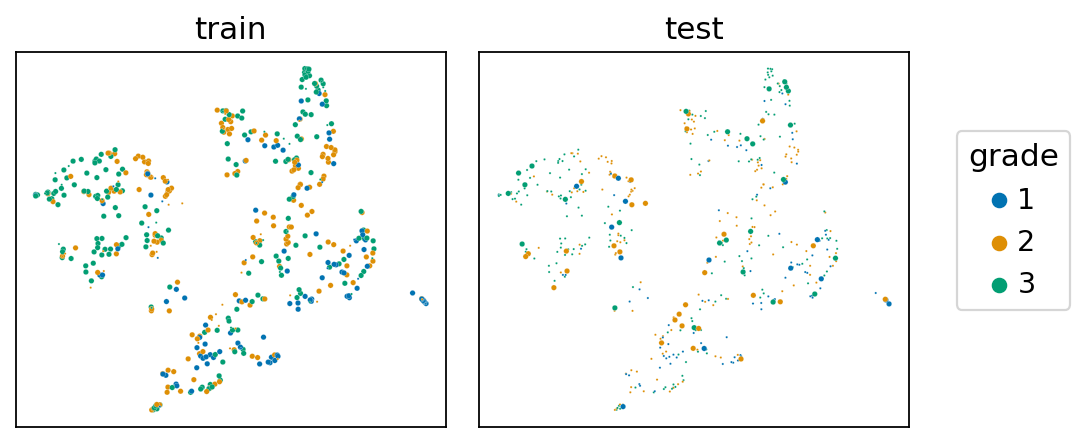

In [19]:
# plotting UMAP of graph embeddings
interpreter.plot_umap_graphs(
    label=group_name,
    data_key=data_key,
    # plt.savefig(dir_figures + f'gcnss_interpretation_umap_graph_{feature_space}_{cell_type_coarseness}.pdf')
)